In [1]:
library(yaml)
library(tidyr)
library(data.table)
library(ggplot2)
library(cowplot)

theme_set(theme_cowplot())
options(repr.plot.width=5, repr.plot.height=5)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
config <- yaml.load_file("../config_small.yaml")
results <- fread(file.path(config$ROOT, "cc_variance.csv"))
results <- separate(results, col = 'setting', sep = '/', c('scenario', 'analysis', 'scaling', 'feature_selection', 'method'))
results <- separate(results, col = 'method', sep = '_', c('method', 'output_type'))

In [3]:
head(results)

batch,before,after,score,scenario,analysis,scaling,feature_selection,method,output_type
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
celseq,0.020963476,0.004693609,0.2238946,pancreas,cc_variance,scaled,hvg,mnn,full
celseq2,0.022376483,0.004071565,0.1819573,pancreas,cc_variance,scaled,hvg,mnn,full
fluidigmc1,0.013319845,0.003722592,0.2794771,pancreas,cc_variance,scaled,hvg,mnn,full
smartseq2,0.068943625,0.011147030,0.1616833,pancreas,cc_variance,scaled,hvg,mnn,full
inDrop,0.046264593,0.039937039,0.8632312,pancreas,cc_variance,scaled,hvg,mnn,full
smarter,0.008667954,0.004172329,0.4813511,pancreas,cc_variance,scaled,hvg,mnn,full


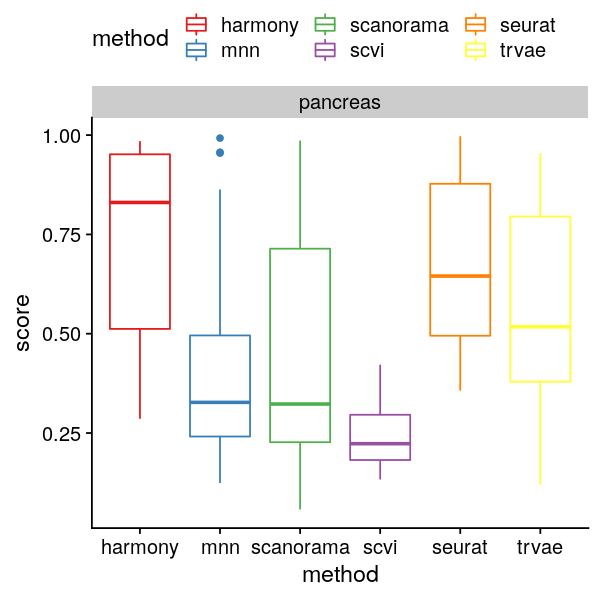

In [4]:
ggplot(results, aes(method, score, col=method)) +
    geom_boxplot() +
    facet_wrap(.~scenario) +
    scale_color_brewer(palette = 'Set1') +
    theme(legend.position = 'top')

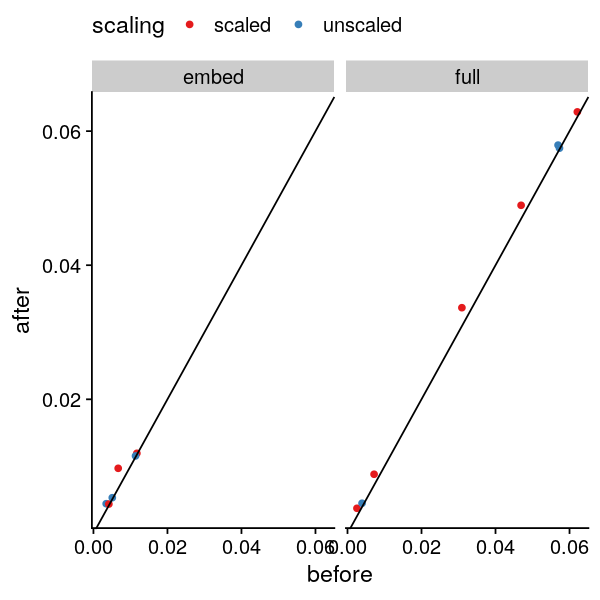

In [5]:
ggplot(results[after>before], aes(before, after, col=scaling)) +
    geom_point() + geom_abline() +
    facet_wrap(.~output_type) +
    scale_color_brewer(palette = 'Set1') +
    theme(legend.position = 'top')

In [6]:
#results[, lfc := (after/before)]
results[, orig := 1 - (abs(before-after)/before)]
results[, other := ((before - (before-after))/before)]

Warning message in `[.data.table`(results, , `:=`(orig, 1 - (abs(before - after)/before))):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”

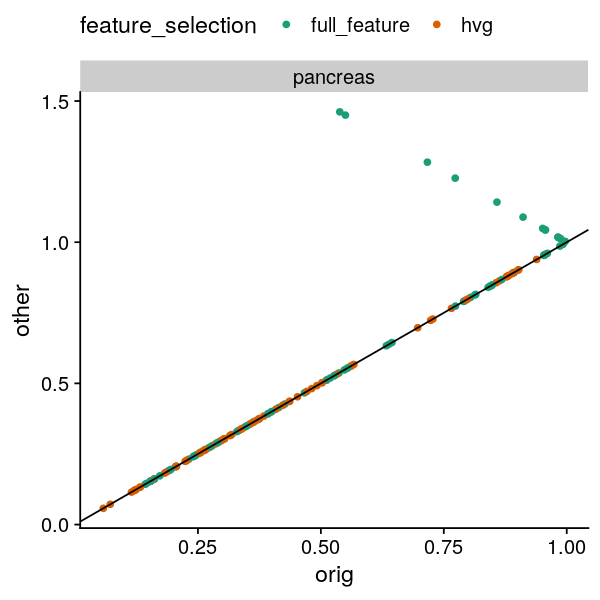

In [7]:
ggplot(results, aes(orig, other, col=feature_selection)) +
    geom_point() + geom_abline() +
    facet_wrap(.~scenario) +
    scale_color_brewer(palette = 'Dark2') +
    theme(legend.position = 'top')